In [1]:
import warnings
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ytrain = pd.read_csv("ytrain23.csv")
ytest = pd.read_excel("ytest23.xlsx")

In [3]:
ytrain

,Unnamed: 0,readmitted,readmitted_2,readmitted_3
0,0,NO,0,0
1,1,NO,0,0
2,2,NO,0,0
3,3,NO,0,0
4,4,NO,0,0
5,5,<30,1,1
6,6,>30,1,2
7,7,NO,0,0
8,8,>30,1,2
9,9,>30,1,2


In [4]:
ytest

,readmit_true,readmit_true_2,readmit_true_3
0,<30,1,1
1,>30,1,2
2,NO,0,0
3,>30,1,2
4,>30,1,2
5,>30,1,2
6,>30,1,2
7,>30,1,2
8,<30,1,1
9,>30,1,2


In [3]:
ytrain2 = ytrain.readmitted_3.replace(2,0)
ytest2 = ytest.readmit_true_3.replace(2,0)

In [7]:
ytrain2.to_csv("Send/ytrain.csv")
ytest2.to_csv("Send/ytest.csv")

In [4]:
data = pd.read_csv("full data.csv")

In [5]:
print(data.shape[0])
print(data.shape[1])

62937
112


In [6]:
data.diag_1.value_counts()

Circulatory        20105
Neoplasms           9032
Respiratory         8892
Digestive           6029
Diabetes            4708
Musculoskeletal     3726
Injury              3500
Other               3313
Genitourinary       3278
Name: diag_1, dtype: int64

In [7]:
data.diag_1 = pd.DataFrame(data.diag_1).fillna('Neoplasms')
data.diag_1.value_counts()

Circulatory        20105
Neoplasms           9386
Respiratory         8892
Digestive           6029
Diabetes            4708
Musculoskeletal     3726
Injury              3500
Other               3313
Genitourinary       3278
Name: diag_1, dtype: int64

In [8]:
data.diag_2 = pd.DataFrame(data.diag_2).fillna('Neoplasms')
data.diag_3 = pd.DataFrame(data.diag_3).fillna('Neoplasms')
print(sum(pd.isnull(data.diag_2)))
print(sum(pd.isnull(data.diag_3)))

0
0


In [9]:
alldata = pd.get_dummies(data)

In [10]:
print(alldata.shape[0])
print(alldata.shape[1])

62937
136


In [11]:
pd.DataFrame(alldata).to_csv("alldata.csv")

In [12]:
xtrainA = alldata[0:50000]
xtestA = alldata[50000:62937]

In [13]:
xtrainA

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory
0,1,1,7,2,19,0,19,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,7,2,1,1,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,7,7,51,1,14,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,7,2,53,3,14,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3,1,7,3,25,1,6,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,1,1,7,2,19,2,15,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,3,3,1,7,65,1,32,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,3,1,1,3,55,2,20,2,0,1,...,0,0,1,0,0,0,0,0,0,0
8,1,6,7,4,63,1,24,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,1,1,7,11,67,1,22,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
xtestA

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory
50000,1,1,7,7,44,0,11,0,0,0,...,0,0,1,0,0,0,0,0,0,0
50001,3,1,1,8,39,1,20,0,0,0,...,0,0,0,0,0,1,0,0,0,0
50002,3,2,1,4,55,2,22,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50003,3,1,1,4,39,1,19,0,0,0,...,0,0,0,0,0,0,0,0,1,0
50004,1,1,1,3,65,0,7,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50005,6,1,17,4,63,1,21,0,0,0,...,0,0,1,0,0,0,0,0,0,0
50006,1,1,1,3,47,3,10,0,0,0,...,0,1,0,0,0,0,0,0,0,0
50007,2,1,1,11,41,1,28,0,0,0,...,0,0,0,0,0,1,0,0,0,0
50008,1,1,7,3,46,0,16,0,0,1,...,0,0,0,0,0,0,0,1,0,0
50009,3,1,1,4,79,3,25,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
xtrainA.to_csv("xtrainA.csv")
xtestA.to_csv("xtestA.csv")

In [15]:
fsel=pd.read_csv("features selected.csv")
xtrainB=fsel[0:50000]
xtestB=fsel[50000:62937]

In [18]:
xtrainB.to_csv("xtrainB.csv")
xtestB.to_csv("xtestB.csv")

In [16]:
#Age changed
data = pd.read_excel("data.xlsx")
print(data.race.value_counts())
data.race = data.race.replace('?','Caucasian')
print(data.race.value_counts())

Caucasian          47016
AfricanAmerican    11363
?                   1729
Hispanic            1345
Other               1043
Asian                441
Name: race, dtype: int64
Caucasian          48745
AfricanAmerican    11363
Hispanic            1345
Other               1043
Asian                441
Name: race, dtype: int64


In [17]:
Data = pd.get_dummies(data)
print(Data.shape[0])
print(Data.shape[1])
xtrainC = Data[0:50000]
xtestC = Data[50000:62937]
xtrainC.to_csv("xtrainC.csv")
xtestC.to_csv("xtestC.csv")

62937
129


In [28]:
#SGD on 136 features xtrainA and xtestA with 2 readmit values with log
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
#Applying SGDClassifierModel
reg=SGDClassifier(loss="log", penalty="elasticnet",n_iter=70, random_state=0)
#reg=SGDClassifier(penalty='l1')
reg.fit(xtrainA,ytrain2)
print(accuracy_score(ytrain2, reg.predict(xtrainA)))
print(reg.score(xtrainA,ytrain2))
sgd136 = reg.predict(xtestA)
#output= reg.decision_function(all_data_test)
#plt.hist(output)
#plt.show()
print("model fit done")
print(sgd136)

pd.DataFrame(sgd136).to_csv('ytestsgd136.csv')
print(np.sum(sgd136))

print('Accuracy for 2 clusters: ',np.sum(sgd136==ytest2)/len(ytest2))

0.2315
0.2315
model fit done
[1 1 1 ..., 1 1 1]
10683
Accuracy for 2 clusters:  0.239159001314


In [34]:
#SGD on 136 features xtrainA and xtestA with 2 readmit values with log
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
#Applying SGDClassifierModel
reg=SGDClassifier(loss="log", penalty="l1")
#reg=SGDClassifier(penalty='l1')
reg.fit(xtrainA,ytrain2)
print(accuracy_score(ytrain2, reg.predict(xtrainA)))
print(reg.score(xtrainA,ytrain2))
sgd136 = reg.predict(xtestA)
#output= reg.decision_function(all_data_test)
#plt.hist(output)
#plt.show()
print("model fit done")
print(sgd136)

pd.DataFrame(sgd136).to_csv('ytestsgd136.csv')
print(np.sum(sgd136))

print('Accuracy for 2 clusters: ',np.sum(sgd136==ytest2)/len(ytest2))

0.90614
0.90614
model fit done
[0 0 0 ..., 0 0 0]
97
Accuracy for 2 clusters:  0.906856303625


In [35]:
#SGD on 26 features xtrainA and xtestA with 2 readmit values with log
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
#Applying SGDClassifierModel
reg=SGDClassifier(loss="log", penalty="l1")
#reg=SGDClassifier(penalty='l1')
reg.fit(xtrainB,ytrain2)
print(accuracy_score(ytrain2, reg.predict(xtrainB)))
print(reg.score(xtrainB,ytrain2))
sgd26 = reg.predict(xtestB)
#output= reg.decision_function(all_data_test)
#plt.hist(output)
#plt.show()
print("model fit done")
print(sgd26)

pd.DataFrame(sgd26).to_csv('ytestsgd26.csv')
print(np.sum(sgd26))

print('Accuracy for 2 clusters: ',np.sum(sgd26==ytest2)/len(ytest2))

0.84884
0.84884
model fit done
[0 0 0 ..., 0 0 0]
912
Accuracy for 2 clusters:  0.863183118188


In [33]:
#SGD on 129 features xtrainA and xtestA with 2 readmit values with log
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
#Applying SGDClassifierModel
reg=SGDClassifier(loss="log", penalty="l1")
#reg=SGDClassifier(penalty='l1')
reg.fit(xtrainC,ytrain2)
print(accuracy_score(ytrain2, reg.predict(xtrainC)))
print(reg.score(xtrainC,ytrain2))
sgd129 = reg.predict(xtestC)
#output= reg.decision_function(all_data_test)
#plt.hist(output)
#plt.show()
print("model fit done")
print(sgd129)

pd.DataFrame(sgd129).to_csv('ytestsgd129.csv')
print(np.sum(sgd129))

print('Accuracy for 2 clusters: ',np.sum(sgd129==ytest2)/len(ytest2))

0.86268
0.86268
model fit done
[0 0 0 ..., 0 0 0]
747
Accuracy for 2 clusters:  0.869598825075


In [36]:
#SGD on 26 features xtrainA and xtestA with 2 readmit values with log
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
#Applying SGDClassifierModel
reg=SGDClassifier(loss="log", penalty="elasticnet",n_iter=70, random_state=0)
#reg=SGDClassifier(penalty='l1')
reg.fit(xtrainB,ytrain2)
print(accuracy_score(ytrain2, reg.predict(xtrainB)))
print(reg.score(xtrainB,ytrain2))
sgd26 = reg.predict(xtestB)
#output= reg.decision_function(all_data_test)
#plt.hist(output)
#plt.show()
print("model fit done")
print(sgd26)

#pd.DataFrame(sgd26).to_csv('ytestsgd26.csv')
#print(np.sum(sgd26))

print('Accuracy for 2 clusters: ',np.sum(sgd26==ytest2)/len(ytest2))

0.22558
0.22558
model fit done
[1 1 1 ..., 1 1 1]
Accuracy for 2 clusters:  0.23119734096


In [37]:
#SGD on 129 features xtrainA and xtestA with 2 readmit values with log
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
#Applying SGDClassifierModel
reg=SGDClassifier(loss="log", penalty="elasticnet",n_iter=70, random_state=0)
#reg=SGDClassifier(penalty='l1')
reg.fit(xtrainC,ytrain2)
print(accuracy_score(ytrain2, reg.predict(xtrainC)))
print(reg.score(xtrainC,ytrain2))
sgd129 = reg.predict(xtestC)
#output= reg.decision_function(all_data_test)
#plt.hist(output)
#plt.show()
print("model fit done")
print(sgd129)

#pd.DataFrame(sgd129).to_csv('ytestsgd129.csv')
#print(np.sum(sgd129))

print('Accuracy for 2 clusters: ',np.sum(sgd129==ytest2)/len(ytest2))

0.22918
0.22918
model fit done
[1 1 1 ..., 1 1 1]
Accuracy for 2 clusters:  0.236840071114


In [39]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
clfA = GaussianNB()
clfA.fit(xtrainA, ytrain2)
GaussianNB(priors=None)
print(clfA.predict(xtestA))
pred=clfA.predict(xtestA)

print('Accuracy for 2 clusters: ',np.sum(pred==ytest2)/len(ytest2))

[1 1 1 ..., 1 1 1]
Accuracy for 2 clusters:  0.104274561336


In [40]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
clfB = GaussianNB()
clfB.fit(xtrainB, ytrain2)
GaussianNB(priors=None)
print(clfB.predict(xtestB))
pred=clfB.predict(xtestB)

print('Accuracy for 2 clusters: ',np.sum(pred==ytest2)/len(ytest2))

[0 0 0 ..., 0 0 0]
Accuracy for 2 clusters:  0.882971322563


In [41]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
clfC = GaussianNB()
clfC.fit(xtrainC, ytrain2)
GaussianNB(priors=None)
print(clfC.predict(xtestC))
pred=clfC.predict(xtestC)

print('Accuracy for 2 clusters: ',np.sum(pred==ytest2)/len(ytest2))

[1 1 1 ..., 1 1 1]
Accuracy for 2 clusters:  0.0996367009353


In [43]:
# k-means on 136 features for 2 clusters (NO & >30 = 0, <30 = 1)
from sklearn.cluster import KMeans

# Input
kmeansA = KMeans(n_clusters=2, random_state=0).fit(xtrainA)

# Gives labels of training points after classification into 2 clusters
print(kmeansA.labels_)

ytrainApred = pd.DataFrame(kmeansA.labels_)
#ytraind2Apred.to_csv('with diag/ytrain2Apred.csv')

c1A=ytrain2[kmeansA.labels_==0]
#saves the ytrain2 values in c1 at indices only pertaining to the label 0
#assume kmeans_labels = {0,1,0,0,1,0} & ytrain2.readmitted = {A,B,C,D,E,F}, then c1 = {A,C,D,F}

c2A=ytrain2[kmeansA.labels_==1]

#Observations of label 0
print("Observations of label 0: ",c1A.shape[0])

#Observations of label 1
print("Observations of label 1: ",c2A.shape[0])

print("Number of YES observations in label 0: ",sum(c1A))
print("Number of YES observations in label 1: ",sum(c2A))

[1 1 0 ..., 0 0 1]
Observations of label 0:  29191
Observations of label 1:  20809
Number of YES observations in label 0:  2811
Number of YES observations in label 1:  1608


In [44]:
#Hence, label 0 corresponds to YES. But initially YES was mapped as 1, therefore swap 0 and 1 in ytest2
ytest2

0        1
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
12907    0
12908    0
12909    0
12910    0
12911    0
12912    0
12913    0
12914    0
12915    0
12916    1
12917    0
12918    0
12919    0
12920    0
12921    0
12922    1
12923    0
12924    0
12925    0
12926    0
12927    0
12928    0
12929    0
12930    0
12931    0
12932    0
12933    0
12934    0
12935    0
12936    0
Name: readmit_true_3, dtype: int64

In [51]:
#SWAP 0 & 1 in ytest2
ytest2s = ytest2.replace(0,'temp')
ytest2s = ytest2s.replace(1,0)
ytest2s = ytest2s.replace('temp',1)
ytest2s

0        0
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        0
9        1
10       1
11       1
12       1
13       0
14       1
15       1
16       1
17       1
18       1
19       0
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
12907    1
12908    1
12909    1
12910    1
12911    1
12912    1
12913    1
12914    1
12915    1
12916    0
12917    1
12918    1
12919    1
12920    1
12921    1
12922    0
12923    1
12924    1
12925    1
12926    1
12927    1
12928    1
12929    1
12930    1
12931    1
12932    1
12933    1
12934    1
12935    1
12936    1
Name: readmit_true_3, dtype: int64

In [52]:
# Predicts labels ytest2
ytestApred = kmeansA.predict(xtestA)
print("Predicted labels for ftest:",ytestApred)

#write to CSV
#pd.DataFrame(ytest2Apred).to_csv('with diag/ytest2Apred.csv')

# Cluster center co-ordinates
print("Cluster Centers:\n",kmeansA.cluster_centers_)

print('Accuracy for 2 clusters: ',np.sum(ytestApred==ytest2)/len(ytest2))

Predicted labels for ftest: [0 1 0 ..., 0 1 1]
Cluster Centers:
 [[  1.95676009e+00   3.64273967e+00   5.95747961e+00   5.04656342e+00
    5.69830056e+01   1.48293702e+00   1.74809840e+01   2.76879326e-01
    1.12040019e-01   2.10134996e-01   7.55074351e+00   1.88686356e-01
    6.13307750e-03   7.39841020e-01   2.07633797e-02   1.62749263e-02
    5.33474954e-01   4.66490783e-01   3.42630028e-05   9.59364079e-04
    4.72829439e-03   1.43904612e-02   3.64900980e-02   9.53881998e-02
    1.72137326e-01   2.18323854e-01   2.59576509e-01   1.69053656e-01
    2.89522374e-02   6.81833756e-03   7.12670458e-03   9.76701158e-01
    9.35379977e-03   5.87610498e-02   1.27698211e-01   7.35386829e-01
    7.81539094e-02   6.71554855e-03   7.97402864e-01   1.82793120e-01
    1.30884671e-02   5.48208045e-04   9.86397588e-01   1.15466319e-02
    1.50757212e-03   2.05578017e-04   9.93078873e-01   6.47570753e-03
    2.39841020e-04   0.00000000e+00   9.98903584e-01   9.59364079e-04
    1.37052011e-04   2.46

In [53]:
# k-means on 26 features for 2 clusters (NO & >30 = 0, <30 = 1)
from sklearn.cluster import KMeans

# Input
kmeansB = KMeans(n_clusters=2, random_state=0).fit(xtrainB)

# Gives labels of training points after classification into 2 clusters
print(kmeansB.labels_)

ytrainBpred = pd.DataFrame(kmeansB.labels_)
#ytraind2Apred.to_csv('with diag/ytrain2Apred.csv')

c1B=ytrain2[kmeansB.labels_==0]
#saves the ytrain2 values in c1 at indices only pertaining to the label 0
#assume kmeans_labels = {0,1,0,0,1,0} & ytrain2.readmitted = {A,B,C,D,E,F}, then c1 = {A,C,D,F}

c2B=ytrain2[kmeansA.labels_==1]

#Observations of label 0
print("Observations of label 0: ",c1B.shape[0])

#Observations of label 1
print("Observations of label 1: ",c2B.shape[0])

print("Number of YES observations in label 0: ",sum(c1B))
print("Number of YES observations in label 1: ",sum(c2B))

[1 1 0 ..., 0 0 1]
Observations of label 0:  29181
Observations of label 1:  20809
Number of YES observations in label 0:  2808
Number of YES observations in label 1:  1608


In [54]:
#Hence, label 0 corresponds to YES. But initially YES was mapped as 1, therefore swap 0 and 1 in ytest2
ytest2

0        1
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
12907    0
12908    0
12909    0
12910    0
12911    0
12912    0
12913    0
12914    0
12915    0
12916    1
12917    0
12918    0
12919    0
12920    0
12921    0
12922    1
12923    0
12924    0
12925    0
12926    0
12927    0
12928    0
12929    0
12930    0
12931    0
12932    0
12933    0
12934    0
12935    0
12936    0
Name: readmit_true_3, dtype: int64

In [55]:
ytest2s

0        0
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        0
9        1
10       1
11       1
12       1
13       0
14       1
15       1
16       1
17       1
18       1
19       0
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
12907    1
12908    1
12909    1
12910    1
12911    1
12912    1
12913    1
12914    1
12915    1
12916    0
12917    1
12918    1
12919    1
12920    1
12921    1
12922    0
12923    1
12924    1
12925    1
12926    1
12927    1
12928    1
12929    1
12930    1
12931    1
12932    1
12933    1
12934    1
12935    1
12936    1
Name: readmit_true_3, dtype: int64

In [56]:
# Predicts labels ytest2
ytestBpred = kmeansB.predict(xtestB)
print("Predicted labels for ftest:",ytestBpred)

#write to CSV
#pd.DataFrame(ytest2Apred).to_csv('with diag/ytest2Apred.csv')

# Cluster center co-ordinates
print("Cluster Centers:\n",kmeansB.cluster_centers_)

print('Accuracy for 2 clusters: ',np.sum(ytestBpred==ytest2)/len(ytest2))

Predicted labels for ftest: [0 1 0 ..., 0 1 1]
Cluster Centers:
 [[  1.95666929   3.64152754   5.95876041   5.04686161  56.99129272
    1.48267115  17.48184841   0.27695314   0.11209763   0.21017449
    7.55106099   0.73984437   0.53344075   0.46652497   0.218299
    0.25964142   0.79733297   0.4471907    0.32014672   0.48109424
    0.51890576   0.22035583   0.77964417   0.33180213   0.32813411
    0.30948545]
 [  2.31744203   3.3855682    5.31897835   3.33160497  24.75606126
    1.4254645   13.70497864   0.28532335   0.0971242    0.1182486
    7.03053435   0.75270056   0.53535935   0.46459264   0.2322243
    0.2528686    0.77550531   0.54443324   0.29881415   0.40986125
    0.59013875   0.26511114   0.73488886   0.29828604   0.3288684
    0.33059676]]
Accuracy for 2 clusters:  0.552446471361


In [57]:
# k-means on 129 features for 2 clusters (NO & >30 = 0, <30 = 1)
from sklearn.cluster import KMeans

# Input
kmeansC = KMeans(n_clusters=2, random_state=0).fit(xtrainC)

# Gives labels of training points after classification into 2 clusters
print(kmeansC.labels_)

ytrainCpred = pd.DataFrame(kmeansC.labels_)
#ytraind2Apred.to_csv('with diag/ytrain2Apred.csv')

c1C=ytrain2[kmeansC.labels_==0]
#saves the ytrain2 values in c1 at indices only pertaining to the label 0
#assume kmeans_labels = {0,1,0,0,1,0} & ytrain2.readmitted = {A,B,C,D,E,F}, then c1 = {A,C,D,F}

c2C=ytrain2[kmeansC.labels_==1]

#Observations of label 0
print("Observations of label 0: ",c1C.shape[0])

#Observations of label 1
print("Observations of label 1: ",c2C.shape[0])

print("Number of YES observations in label 0: ",sum(c1C))
print("Number of YES observations in label 1: ",sum(c2C))

[1 1 0 ..., 0 0 1]
Observations of label 0:  29191
Observations of label 1:  20809
Number of YES observations in label 0:  2811
Number of YES observations in label 1:  1608


In [58]:
# Predicts labels ytest2
ytestCpred = kmeansC.predict(xtestC)
print("Predicted labels for ftest:",ytestCpred)

#write to CSV
#pd.DataFrame(ytest2Apred).to_csv('with diag/ytest2Apred.csv')

# Cluster center co-ordinates
print("Cluster Centers:\n",kmeansC.cluster_centers_)

print('Accuracy for 2 clusters: ',np.sum(ytestCpred==ytest2)/len(ytest2))

Predicted labels for ftest: [0 1 0 ..., 0 1 1]
Cluster Centers:
 [[  1.95672731e+00   3.64282043e+00   5.95751533e+00   5.04642478e+00
    5.69824922e+01   1.48288622e+00   1.74806249e+01   2.76938363e-01
    1.12070442e-01   2.10127797e-01   7.55072464e+00   1.88679892e-01
    6.13286737e-03   7.68150204e-01   2.07626683e-02   1.62743687e-02
    5.33490938e-01   4.66474800e-01   3.42618289e-05   2.00774317e-02
    3.04005208e-01   6.75917360e-01   3.31825813e-01   8.21598657e-02
    1.02888272e-01   5.55384246e-02   5.15297907e-02   3.48100182e-02
    1.37115839e-01   5.48531881e-02   1.49278789e-01   3.28159797e-01
    1.21252612e-01   4.49172577e-02   8.71278309e-02   2.23387124e-02
    1.46298009e-02   1.88953986e-01   7.73974715e-02   1.15222531e-01
    3.09384315e-01   1.70247028e-01   4.38551410e-02   7.22924590e-02
    2.22701888e-02   1.85699113e-02   1.97416658e-01   8.79158529e-02
    7.80484462e-02   6.81810395e-03   7.12646041e-03   9.76701956e-01
    9.35347929e-03   5.87

In [23]:
#DecisionTreeClassifier136
from sklearn.tree import DecisionTreeClassifier

dtcA = DecisionTreeClassifier(random_state=0)
dtcA.fit(xtrainA, ytrain2)
print(dtcA.predict(xtestA))
predA=dtcA.predict(xtestA)

print('Accuracy for 136 features: ',np.sum(predA==ytest2)/len(ytest2))

[0 0 0 ..., 0 0 0]
Accuracy for 136 features:  0.833500811626


In [24]:
#DecisionTreeClassifier26
from sklearn.tree import DecisionTreeClassifier

dtcB = DecisionTreeClassifier(random_state=0)
dtcB.fit(xtrainB, ytrain2)
print(dtcB.predict(xtestB))
predB=dtcB.predict(xtestB)

print('Accuracy for 26 features: ',np.sum(predB==ytest2)/len(ytest2))

[0 0 1 ..., 0 0 0]
Accuracy for 26 features:  0.824998067558


In [25]:
#DecisionTreeClassifier129
from sklearn.tree import DecisionTreeClassifier

dtcC = DecisionTreeClassifier(random_state=0)
dtcC.fit(xtrainC, ytrain2)
print(dtcC.predict(xtestC))
predC=dtcC.predict(xtestC)

print('Accuracy for 129 features: ',np.sum(predC==ytest2)/len(ytest2))

[0 0 1 ..., 0 0 0]
Accuracy for 129 features:  0.832805132566


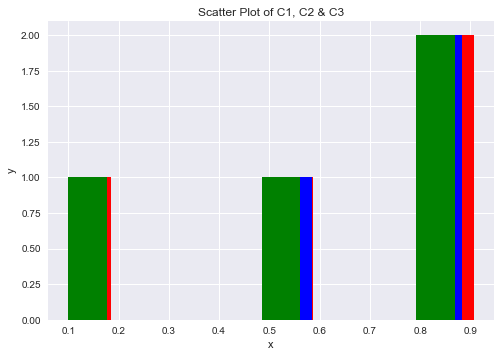

In [3]:
import matplotlib.pyplot as plt
c136=[0.906856304,0.104274561,0.552601067,0.833500812]
c26=[0.863183118,0.882971323,0.552446471,0.824998068]
c129=[0.869598825,0.099636701,0.552601067,0.832805133]
#pd.DataFrame.plot(kind='scatter',x='c1x',y='c1y',color='b')
#plt.scatter(c1x,c1y,label='C1',color='b')
#plt.scatter(c2x,c2y,label='C2',color='g')
plt.hist(c136,label='c136',color='r')
plt.hist(c26,label='c26',color='b')
plt.hist(c129,label='c129',color='g')
#plt.plot([-4,6],[7,-4],label='L1',color='y')
#plt.plot([-5,6],[0,0],label='L2',color='c')
#plt.plot([0.3,0.3],[7,-4],label='L3',color='m')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of C1, C2 & C3')
#plt.axis([-5,6,-4,7])
#plt.legend()
plt.show()